# STAT 301 Group Project

## 1. Introduction

Consumer spending patterns have long been a central focus in economics and marketing because they reveal how people allocate limited resources and respond to changes in their financial circumstances. These patterns have been used by businesses to determine their target markets, policy makers aiming to predict economic behaviour, and even sociologists and psychologists looking to explore the relationship between wealth and wellbeing. Over time, economists have developed theories to explain how income shapes consumption.

Long-established economic principle Engel’s Law (1857) proposes a negative stochastic association between household income level and the proportion of spending on necessities such as food. The shift in priorities towards non-essential and luxury items with increased income has been observed across countries and decades and it remains a key framework in understanding how income and human behaviour are related. However in more recent literature, He & Tsvetkova (2025) find that consumption practices are determined by a combination of economic, cultural, and social forces, suggesting that individuals’ spending habits are not determined by income alone, but by preferences, opportunities, and norms within their social environment. This represents a more modern view of Engel’s law where the income-spending patterns are further complicated by factors such as demographic differences, lifestyle segmentation, and targeted marketing, all of which may alter spending habits even within similar income groups.

The dataset selected for this project is the Customer Personality Analysis dataset, publicly available on Kaggle. It was originally provided by Dr. Omar Romero-Hernandez and was collected using customer data from ad campaigns. It includes information on customer demographics, product spending (over the past two years), promotion engagement, place that customers purchased from, and other predictive variables. In total, the dataset contains 28 variables, 5 of those categorical and 23 numerical, detailed below, and responses from 2204 customers.

#### **Variable Descriptions by Category**

<div style="display: flex; gap: 2em;">

<div style="flex: 1;">

#### People (Customer)
| Variable         | Description                                                  |
|------------------|--------------------------------------------------------------|
| `ID`             | Customer's unique identifier                                 |
| `Year_Birth`     | Year of birth                                                |
| `Education`      | Customer's education level                                   |
| `Marital_Status` | Customer's marital status                                    |
| `Income`         | Yearly household income                                      |
| `Kidhome`        | Number of children in the customer's household               |
| `Teenhome`       | Number of teenagers in the customer's household              |
| `Dt_Customer`    | Date of enrollment with the company                          |
| `Recency`        | Days since the customer's last purchase                      |
| `Complain`       | 1 if the customer complained in the last 2 years, 0 otherwise|

</div>

<div style="flex: 1;">

#### Products (Spending in Last 2 Years)
| Variable             | Description                   |
|----------------------|-------------------------------|
| `MntWines`           | Amount spent on wine          |
| `MntFruits`          | Amount spent on fruits        |
| `MntMeatProducts`    | Amount spent on meat          |
| `MntFishProducts`    | Amount spent on fish          |
| `MntSweetProducts`   | Amount spent on sweets        |
| `MntGoldProds`       | Amount spent on gold          |

</div>

</div>

<div style="display: flex; gap: 2em;">

<div style="flex: 1;">

#### Place (of Purchase)
| Variable              | Description                                  |
| --------------------- | -------------------------------------------- |
| `NumWebPurchases`     | Purchases made through the company’s website |
| `NumCatalogPurchases` | Purchases made using a catalogue             |
| `NumStorePurchases`   | Purchases made directly in physical stores   |
| `NumWebVisitsMonth`   | Visits to the website in the last month      |

</div>

<div style="flex: 1;">

#### Promotion (Campaign Engagement)
| Variable            | Description                                        |
| ------------------- | -------------------------------------------------- |
| `NumDealsPurchases` | Number of purchases made with a discount           |
| `AcceptedCmp1`      | 1 if accepted the 1st campaign offer, 0 otherwise  |
| `AcceptedCmp2`      | 1 if accepted the 2nd campaign offer, 0 otherwise  |
| `AcceptedCmp3`      | 1 if accepted the 3rd campaign offer, 0 otherwise  |
| `AcceptedCmp4`      | 1 if accepted the 4th campaign offer, 0 otherwise  |
| `AcceptedCmp5`      | 1 if accepted the 5th campaign offer, 0 otherwise  |
| `Response`          | 1 if accepted the last campaign offer, 0 otherwise |

</div>

</div>


#### **Research Question**
In order to explore Engel's law with recent literature considered, our question is: **How is a customer’s income level associated with their demographics (e.g. marital status, education, age, children) and product spending habits (e.g. money spent on wine, gold, fruits, meat, fish, sweets, whether an individual accepted a campaign, complained, and their total spending)?**

In this analysis, the **response variable** is `Income`, which is continuous.

The potential **explanatory variables** of interest were `MntWines`, `MntGoldProds`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`, `Complain`, `Education`, `MaritalClass`, `Age`, `TotalKids`, `NumPurchases`, and `AcceptedAny`. These were all variables that quantified demographic and spending habits.

By exploring the relationships between the potential explanatory variables and income using visualizations and correlation analysis, we can assess which factors are most strongly associated with income and apply appropriate regression models to quantify the effect and thus help us answer our question.

## 2. Methods and Results

### a) Exploratory Data Analysis (EDA)
> The majority of the code included in the EDA was copied from Jessie's individual portion, as the team decided to proceed with the same research question.

#### Data Cleaning

In [9]:
# loading the package
library(tidyverse)
library(dplyr)
library(reshape2)
library(ggplot2)
library(rsample)
library(broom)
library(car)

**Table 1**. First 6 rows of the original dataset

In [10]:
# Main developer: Jessie 
# reading the dataset into R
data <- read_tsv("data/marketing_campaign.csv")
head(data)

Rows: 2240 Columns: 29
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (3): Education, Marital_Status, Dt_Customer
dbl (26): ID, Year_Birth, Income, Kidhome, Teenhome, Recency, MntWines, MntF...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,⋯,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,⋯,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,⋯,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,⋯,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,⋯,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,⋯,5,0,0,0,0,0,0,3,11,0
7446,1967,Master,Together,62513,0,1,09-09-2013,16,520,⋯,6,0,0,0,0,0,0,3,11,0


To tidy the data, we look for rows that contain null value. In this case only the `Income` column contains invalid data, so we remove them from the dataset.

In [11]:
# Main developer: Jessie 
colSums(is.na(data))
data <- na.omit(data)

ID          Year_Birth           Education      Marital_Status 
                  0                   0                   0                   0 
             Income             Kidhome            Teenhome         Dt_Customer 
                 24                   0                   0                   0 
            Recency            MntWines           MntFruits     MntMeatProducts 
                  0                   0                   0                   0 
    MntFishProducts    MntSweetProducts        MntGoldProds   NumDealsPurchases 
                  0                   0                   0                   0 
    NumWebPurchases NumCatalogPurchases   NumStorePurchases   NumWebVisitsMonth 
                  0                   0                   0                   0 
       AcceptedCmp3        AcceptedCmp4        AcceptedCmp5        AcceptedCmp1 
                  0                   0                   0                   0 
       AcceptedCmp2            Complain       Z_CostContact           Z_Revenue 
                  0                   0                   0                   0 
           Response 
                  0

For easier analysis, we prepare new candidate variables for age (`Age`), total number of children at home (`NumKids`), a binary indicator for whether a customer accepted any marketing campaign (`AcceptedAny`), and the total number of purchase using a summation of `NumWebPurchases`, `NumCatalogPurchases`, and `NumStorePurchases` (`NumPurchases`)

In [12]:
# Main developer: Jessie 
# Contributor: Annmarie (NumPurchases)

# Create new variables of interest
data <- data %>%
  mutate(
    Age = 2025 - Year_Birth,  # Compute age from birth year
    NumKids = Kidhome + Teenhome,  # Combine children at home into a single count
    AcceptedAny = as.integer(AcceptedCmp1 + AcceptedCmp2 + AcceptedCmp3 + AcceptedCmp4 + AcceptedCmp5 + Response > 0),  
    # Create binary indicator: 1 if accepted any campaign (including final response), 0 otherwise
    NumPurchases = NumWebPurchases + NumCatalogPurchases + NumStorePurchases
  )

Next, the following code recodes `TotalKids` into categorical labels, simplifies `Marital_Status` into broader relationship groups, and converts `Education` into ordered levels for easier interpretation and analysis.

In [13]:
# Main developer: Jessie 
# Convert TotalKids from a number to categories
data <- data %>%
  mutate(TotalKids = case_when(
    NumKids == 0 ~ "No Kids",
    NumKids == 1 ~ "One Kid",
    NumKids >= 2 ~ "Two or More Kids"
  ))

# Recode Marital_Status into broader groups
data <- data %>%
  mutate(MaritalClass = case_when(
    Marital_Status %in% c("Married", "Together") ~ "Living Together",
    Marital_Status %in% c("Single", "Alone", "YOLO", "Absurd") ~ "Living Alone",
    Marital_Status %in% c("Divorced", "Widow") ~ "Separated",
    TRUE ~ "Other"  
  ))

# Recode Education into ordered levels
data <- data %>%
  mutate(Education = case_when(
    Education == "Basic" ~ "Low",
    Education == "Graduation" ~ "Medium",
    Education %in% c("2n Cycle", "Master", "PhD") ~ "High",
    TRUE ~ "Other"
  ))

**Table 2**. summary for the count for each level in the categorical variables that we created

In [14]:
# Main developer: Jessie 
# Count each variable
kids_count <- data %>% count(TotalKids)
marital_count <- data %>% count(MaritalClass)
edu_count <- data %>% count(Education)

# Combine side by side
side_by_side <- cbind(
  as.data.frame(kids_count),
  as.data.frame(marital_count),
  as.data.frame(edu_count)
)

side_by_side

TotalKids,n,MaritalClass,n,Education,n
<chr>,<int>,<chr>,<int>,<chr>,<int>
No Kids,633,Living Alone,478,High,1046
One Kid,1117,Living Together,1430,Low,54
Two or More Kids,466,Separated,308,Medium,1116


In [15]:
# Main developer: Jessie 
# convert all categorical variables into factors
data <- data %>%
  mutate(Complain = as.factor(Complain),
        TotalKids = as.factor(TotalKids),
        MaritalClass = as.factor(MaritalClass),
        Education = as.factor(Education),
        AcceptedAny = as.factor(AcceptedAny))

### Exploratory Data Analysis

After wrangling the data, these are the variables of interest that we think might be closely related to the outcome:

- Demographic factors: `Income`, `Education`, `MaritalClass`, `Age`, `TotalKids`
- Purchase history: `MntWines`, `MntGoldProds`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`, `Complain`
- Total spending: `NumPurchases`
- Past campaign behavior: `AcceptedAny`

Let's select these columns and do more investigation:

**Table 3**. data with selected columns

In [16]:
# Main developer: Jessie 
# Keep only relevant columns for analysis
customer_data <- data %>%
  select(
    Income, Age, TotalKids, MaritalClass, Education,
    MntWines, MntGoldProds, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, Complain, 
    NumPurchases,
    AcceptedAny
  )

head(customer_data)

Income,Age,TotalKids,MaritalClass,Education,MntWines,MntGoldProds,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,Complain,NumPurchases,AcceptedAny
<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>
58138,68,No Kids,Living Alone,Medium,635,88,88,546,172,88,0,22,1
46344,71,Two or More Kids,Living Alone,Medium,11,6,1,6,2,1,0,4,0
71613,60,No Kids,Living Together,Medium,426,42,49,127,111,21,0,20,0
26646,41,One Kid,Living Together,Medium,11,5,4,20,10,3,0,6,0
58293,44,One Kid,Living Together,High,173,15,43,118,46,27,0,14,0
62513,58,One Kid,Living Together,High,520,14,42,98,0,42,0,20,0


We first use a histogram to help us understand the distribution of the response variable. We can see that the distribution is right-skewed, suggesting there exists extremely large values. We decided to remove the outliers using the IQR method.

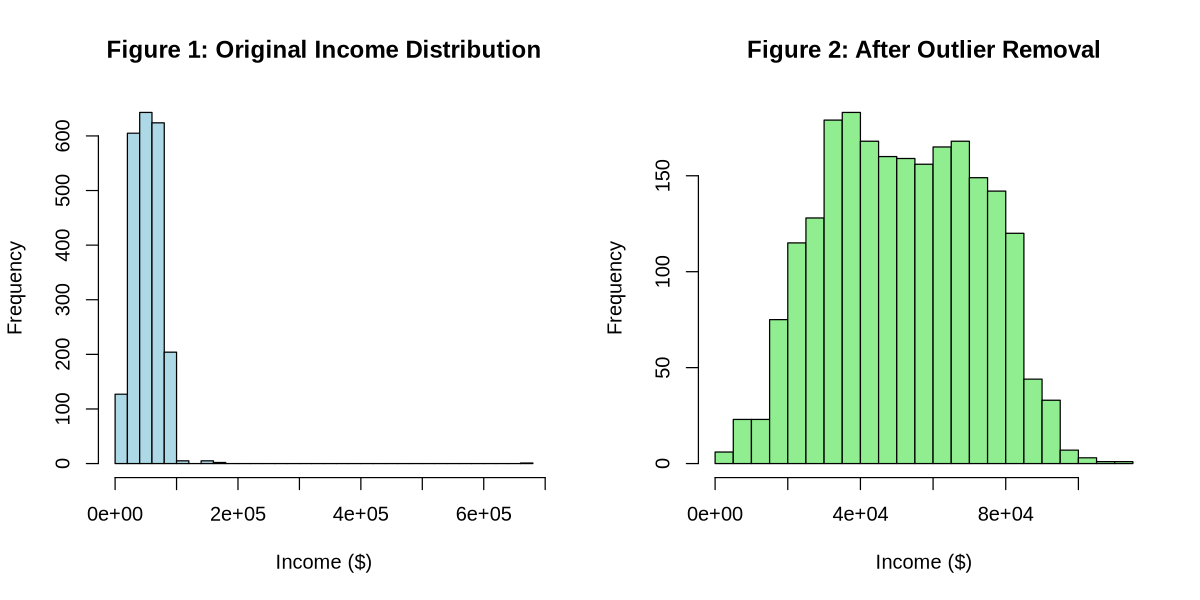

In [17]:
# Main developer: Jessie 
options(repr.plot.width = 10, repr.plot.height = 5)
par(mfrow = c(1, 2))

# Plot 1: Original income distribution
hist(data$Income,
     breaks = 30,
     main = "Figure 1: Original Income Distribution",
     xlab = "Income ($)",
     col = "lightblue")

# Plot 2: Income distribution after removing outliers
Q1 <- quantile(customer_data$Income, 0.25)
Q3 <- quantile(customer_data$Income, 0.75)
IQR <- Q3 - Q1
customer_data <- customer_data[customer_data$Income >= (Q1 - 1.5 * IQR) &
                               customer_data$Income <= (Q3 + 1.5 * IQR), ]

hist(customer_data$Income,
     breaks = 30,
     main = "Figure 2: After Outlier Removal",
     xlab = "Income ($)",
     col = "lightgreen")

par(mfrow = c(1, 1))

### Visualization (Heatmap)
- This plot is relevant because it helps identify which numerical variables are most strongly associated with the response variable. Also, it supports checking potential violations of regression assumptions like multicollinearity.

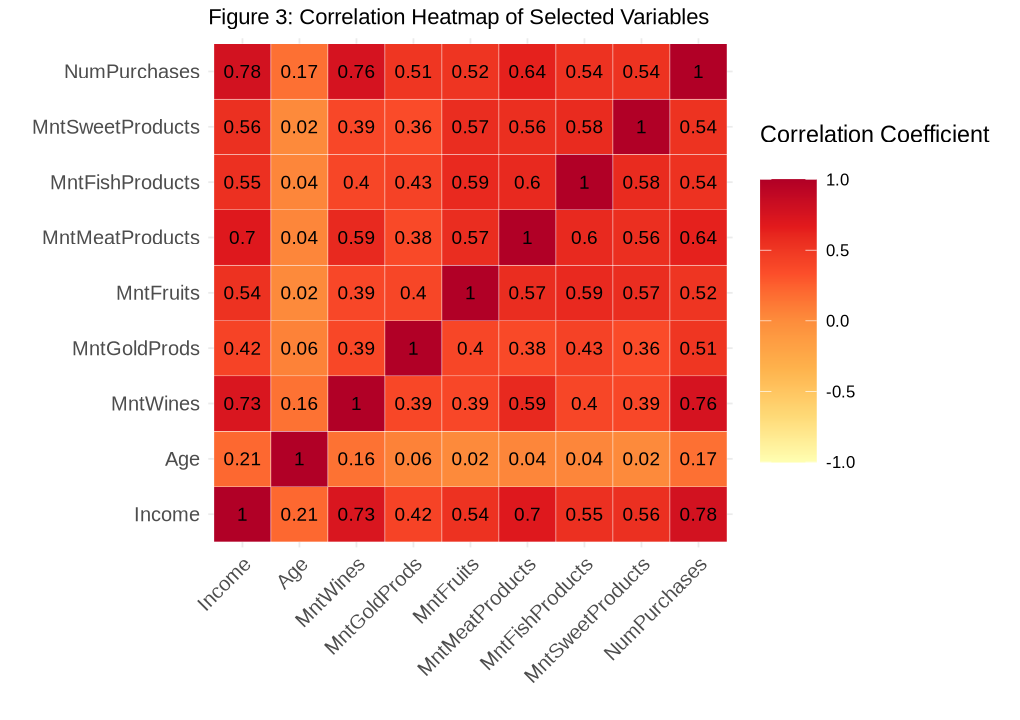

In [18]:
# Main developer: Jessie 
data_numeric <- customer_data %>% 
  select(where(is.numeric))

corr_matrix <- cor(data_numeric, use = "complete.obs")

# Convert the correlation matrix into long format
corr_long <- melt(corr_matrix, varnames = c("var1", "var2"), value.name = "corr")
options(repr.plot.width = 8.5, repr.plot.height = 6) 

# Create the heatmap plot
plot_corr_matrix <- 
  ggplot(corr_long, aes(x = var1, y = var2)) +
  geom_tile(aes(fill = corr), color = "white") +
  scale_fill_distiller("Correlation Coefficient \n",
      palette = "YlOrRd",
      direction = 1, 
      limits = c(-1, 1)
    ) +
  geom_text(aes(label = round(corr, 2)), color = "black", size = 4) +
  labs(
    title = "Figure 3: Correlation Heatmap of Selected Variables",
    x = "", y = ""
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1, size = 12),
    axis.text.y = element_text(size = 12),
    legend.title = element_text(size = 14),
    legend.text = element_text(size = 10),
    legend.key.size = unit(1.2, "cm")
  ) +
 coord_cartesian()

plot_corr_matrix

The heatmap reveals that `Income` is strongly positively associated with `NumPurchases` (0.78), `MntWines` (0.73), and `MntMeatProducts` (0.70), indicating that higher-income customers tend to purchase more overall and spend more in these categories. Moderate correlations are observed between `Income` and `MntSweetProducts` (0.56), `MntFishProducts` (0.55), and `MntFruits` (0.54), while `MntGoldProds` shows the weakest income relationship (0.42). Product spending categories are themselves moderately to strongly correlated (e.g., `MntMeatProducts`–`MntFishProducts` at 0.60), suggesting potential overlapping purchasing behaviors. Finally, `Age` shows weak correlations with `Income` (0.21) or any of the spending activity measures. No pairwise correlations exceed the common multicollinearity threshold of 0.8, so no variables are removed at this stage.

#### Visualization (Boxplots)

Next, we look at the relationship between different levels of the categorical variables and `Income` using boxplots. This type of plot is relevant because it allows us to visually assess how income varies across different groups. 

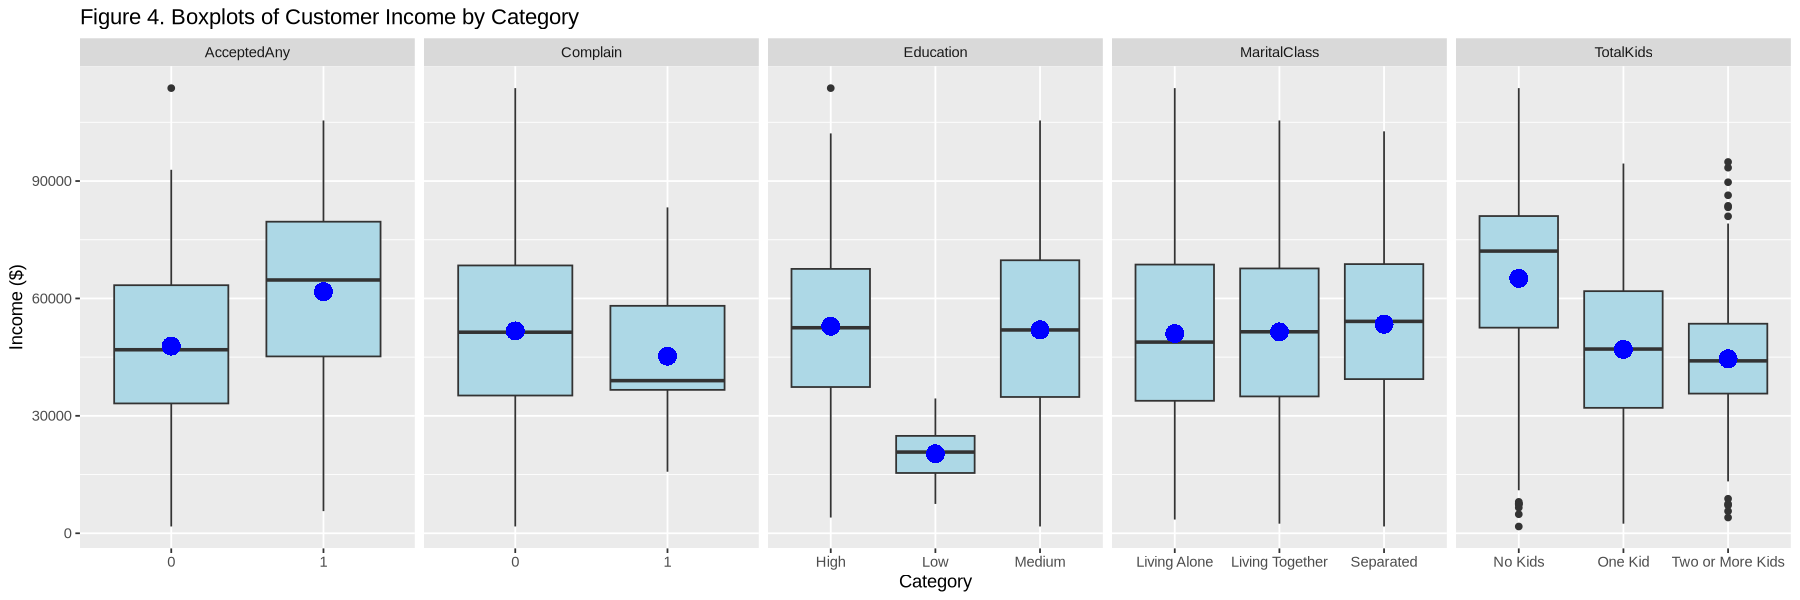

In [19]:
# Main developer: Jessie 
options(repr.plot.width = 15, repr.plot.height = 5) 

# Plot boxplots for each categorical variable vs. Income
df_long <- customer_data %>%
  select(Income, MaritalClass, Education, TotalKids, Complain, AcceptedAny) %>%
  pivot_longer(cols = -Income, names_to = "Variable", values_to = "Category")

ggplot(df_long, aes(x = Category, y = Income)) +
    geom_boxplot(fill = "lightblue") +
    facet_grid(. ~ Variable, scales = "free_x") +
    stat_summary(aes(x = Category, y = Income),
    fun = "mean", colour = "blue", geom = "point",
    shape = 16, size = 5
    ) + 
    labs(
        title = "Figure 4. Boxplots of Customer Income by Category",
        x = "Category",
        y = "Income ($)"
    )

We can observe that certain groups, such as individuals with "High" or "Medium" education levels or those with "No Kids," tend to have higher median and average incomes compared to others. These patterns suggest that categorical variables like `Education`, `TotalKids`, and `AcceptedAny` could be useful in explaining variation in income. `Complain` and `Marital Status`  has visible variation too. For the purpose of explanatory variable selection, we chose to further explore `Education` and `TotalKids` as predictors as these are factors commonly considered as being relevant to income and the explanatory plot suggests so as well.

### b) Analysis Plan

After completing exploratory data analysis and variable recoding, we split the dataset into two equally sized subsets to create a selection set for model specification and a training set for final model estimation. We used a reproducible random seed (`set.seed(301)`) and row ids. The selection set was created with `slice_sample(prop = 0.5)` and the training set obtained via anti_join() to ensure no overlap. In the selection subset, we first fit a null model (`lm(Income ~ 1)`) and a full model containing all the potential explanatory variables we identified in EDA (`lm(Income ~ ., ...)`). To identify a parsimonious set of predictors, we applied forward stepwise selection via `MASS::stepAIC()` with the penalty parameter set to `k = log(nrow(customer_sel))`, corresponding to the metric BIC. We chose to use BIC because we wanted to chose the most accurate model for our inference and BIC has a stronger penalty than AIC. The selected predictors were then refit on the training data using `lm()`. 

Model performance was assessed by comparing the final model to the null model using `broom::glance()`. We examined multicollinearity using `car::vif()`, determinging that variables were colinear if their variance inflation factor was above 5, and evaluated regression assumptions through residual vs. fitted plots, nonlinearity/heteroscedasticity checks, and normality assessment via Q–Q plots (`car::qqPlot()`). This workflow ensured that there was no risk of post-inference bias since the final model was fit on a dataset independent from variable selection.

### Model Selection

**Table 4**. dataset after cleaning and wrangling

In [20]:
# Main developer: Jessie 
head(customer_data)

Income,Age,TotalKids,MaritalClass,Education,MntWines,MntGoldProds,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,Complain,NumPurchases,AcceptedAny
<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>
58138,68,No Kids,Living Alone,Medium,635,88,88,546,172,88,0,22,1
46344,71,Two or More Kids,Living Alone,Medium,11,6,1,6,2,1,0,4,0
71613,60,No Kids,Living Together,Medium,426,42,49,127,111,21,0,20,0
26646,41,One Kid,Living Together,Medium,11,5,4,20,10,3,0,6,0
58293,44,One Kid,Living Together,High,173,15,43,118,46,27,0,14,0
62513,58,One Kid,Living Together,High,520,14,42,98,0,42,0,20,0


In [21]:
# Main developer: Jessie 
set.seed(301)

# Split customer_data into selection and training set
customer_data <- customer_data |> mutate(row_id = row_number())

customer_sel <- customer_data |> slice_sample(prop = 0.5)
customer_train <- customer_data |> anti_join(customer_sel, by = "row_id")

customer_sel <- customer_sel |> select(-row_id)
customer_train <- customer_train |> select(-row_id)

In [22]:
# Main developer: Jessie 
# number of rows for selection and training set
cat('\nSelection data has', nrow(customer_sel), 'rows.')
cat('\nTraining data has', nrow(customer_train), 'rows.\n')


Selection data has 1104 rows.
Training data has 1104 rows.


In [23]:
# Main developer: Jessie 
# Fit the null and full model with all existing covariates as predictors using LS
customer_null <- lm(Income ~ 1, customer_sel)
customer_full <- lm(Income ~ ., customer_sel)

In [24]:
# Main developer: Jessie 
# Forward selection on the selection set using stepAIC() with metric BIC
modAIC_forward <- MASS::stepAIC(customer_null, direction = "forward",
              scope = list(lower = customer_null, upper = customer_full), k = log(nrow(customer_sel))) 

Start:  AIC=21964.67
Income ~ 1

                   Df  Sum of Sq        RSS   AIC
+ NumPurchases      1 3.0298e+11 1.7646e+11 20868
+ MntWines          1 2.6400e+11 2.1544e+11 21088
+ MntMeatProducts   1 2.5363e+11 2.2581e+11 21140
+ MntFishProducts   1 1.5572e+11 3.2372e+11 21538
+ MntSweetProducts  1 1.4984e+11 3.2960e+11 21558
+ MntFruits         1 1.4552e+11 3.3392e+11 21572
+ TotalKids         2 1.0034e+11 3.7910e+11 21719
+ MntGoldProds      1 8.7488e+10 3.9195e+11 21749
+ AcceptedAny       1 3.8683e+10 4.4076e+11 21879
+ Education         2 2.7418e+10 4.5202e+11 21914
+ Age               1 1.5104e+10 4.6434e+11 21936
<none>                           4.7944e+11 21965
+ Complain          1 1.0018e+08 4.7934e+11 21971
+ MaritalClass      2 2.0263e+08 4.7924e+11 21978

Step:  AIC=20868.21
Income ~ NumPurchases

                   Df  Sum of Sq        RSS   AIC
+ MntMeatProducts   1 3.5885e+10 1.4058e+11 20624
+ MntWines          1 2.0737e+10 1.5572e+11 20737
+ TotalKids         2 1

`stepAIC()` selects all categorical variables together, which is preferable to `regsubsets` in our case, given the number of categorical variables we have.

### c) Results

In [25]:
# Main developer: Jessie 
# Fit an additive multiple linear regression model with the selected variables using the training set
customer_generative <- lm(Income ~ MntFruits + MntFishProducts + Complain + AcceptedAny + MntGoldProds + MaritalClass, customer_train)

### Multicollinearity

**Table 5**. VIF table

In [26]:
# Main developer: Annmarie 
# check multicollinearity using Variance Inflation Factor (VIF)
vif(customer_generative)

,GVIF,Df,GVIF^(1/(2*Df))
MntFruits,1.539971,1,1.240956
MntFishProducts,1.592543,1,1.261960
Complain,1.002769,1,1.001384
AcceptedAny,1.061748,1,1.030411
MntGoldProds,1.275885,1,1.129551
MaritalClass,1.013004,2,1.003235


We see that all variables have GVIF values below 2, well under the common threshold that signals problematic multicollinearity. This suggests that the input variables are not highly correlated with each other, and multicollinearity is not a concern in our model.

### Adjust R-squared

In [27]:
# Main developer: Annmarie 
# Check the model fit by comparing it to the null model
glance(customer_generative)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.4295834,0.4259402,15596.05,117.9147,6.417706e-129,7,-12221.36,24460.73,24505.79,266587558486,1096,1104


The adjusted R-squared value of 0.4296 indicates that the model explains approximately 42.96% of the variation in customer income in the training data. The overall regression model is statistically significant (p.value < 0.05), indicating that at least one predictor is associated with income.

**Table 6**. summary of the fitted model

In [28]:
# Main developer: Jessie 
# Display the summary of the model to see coefficients and statistics
tidy(customer_generative)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),36677.01791,1129.54111,32.4707243,1.373042e-162
MntFruits,155.13140,15.10601,10.2695148,1.099310e-23
MntFishProducts,103.55819,10.72937,9.6518381,3.275809e-21
Complain1,-4511.68329,4732.52934,-0.9533345,3.406308e-01
AcceptedAny1,9551.07903,1083.85768,8.8121155,4.726671e-18
MntGoldProds,56.73887,10.12546,5.6035854,2.654876e-08
MaritalClassLiving Together,2019.28633,1157.04082,1.7452162,8.122750e-02
MaritalClassSeparated,3835.10724,1621.77220,2.3647632,1.821508e-02


### Selected Fitted Model

$$
\begin{aligned}
\text{Income (\$)} &= 36{,}677.0 \\
&\quad + 155.1 \times \text{(Amount spent on fruit)} \\
&\quad + 103.6 \times \text{(Amount spent on fish)} \\
&\quad - 4{,}511.7 \times \text{(Complain in last 2 years: 1 if Yes, 0 if No)} \\
&\quad + 9{,}551.1 \times \text{(Accepted 1st campaign: 1 if Yes, 0 if No)} \\
&\quad + 56.7 \times \text{(Amount spent on gold)} \\
&\quad + 2{,}019.3 \times \text{(Marital status: Living together)} \\
&\quad + 3{,}835.1 \times \text{(Marital status: Separated)}
\end{aligned}
$$


### Model Interpretation
- All interpretations are made holding all other variables constant.
- Coefficients that are not statistically significant are still interpreted but are noted as such to indicate that the observed effect may be due to random variation rather than a true relationship.


Intercept: 36677
- When all covariates are zero (which is unrealistic in practice), the baseline income is expected to be $36,677.
  
Amount spend on fruit: 155
- One dollar increase in amount spend on fruit is associated with an expected increase of $155 in income.

Amount spend on fish: 103
- One dollar increase in amount spend on fish is associated with an expected increase of $103 in income.

Customer complained in the last 2 years: 4511 **(Not statistically significant)**
- Customers who complained in the last 2 years have an estimated income $4,511 lower than those who did not, holding other factors constant.

Accepted any campaign offer: 9551
- Customers who accepted any campaign offer have an estimated income $9,551 higher than those who did not.

Amount spend on gold: 56
- One dollar increase in amount spend on gold is associated with an expected increase of $56 in income.

Marital Status Together: 2019 **(Not statistically significant)**
- Having a marital status of "Living together" is associated with an estimated $2,019 higher income compared to the baseline category ("Living alone").

Marital Status Separated: 3835
- Having a marital status of "Separated" is associated with an estimated $3,835 higher income compared to the baseline category ("Living alone").


### Model Diagnostic

#### Assumptions to Apply MLR:
1. Linearity – The relationship between each predictor and the response is linear.
2. Independence – Observations are independent.
3. Homoscedasticity – The residuals have constant variance.
4. Normality of residuals – Residuals should be approximately normally distributed.

To check all the assumptions, we conducted model diagnostics on the forward-selected model by plotting its residual plot and Q-Q plot below.

`geom_smooth()` using formula = 'y ~ x'


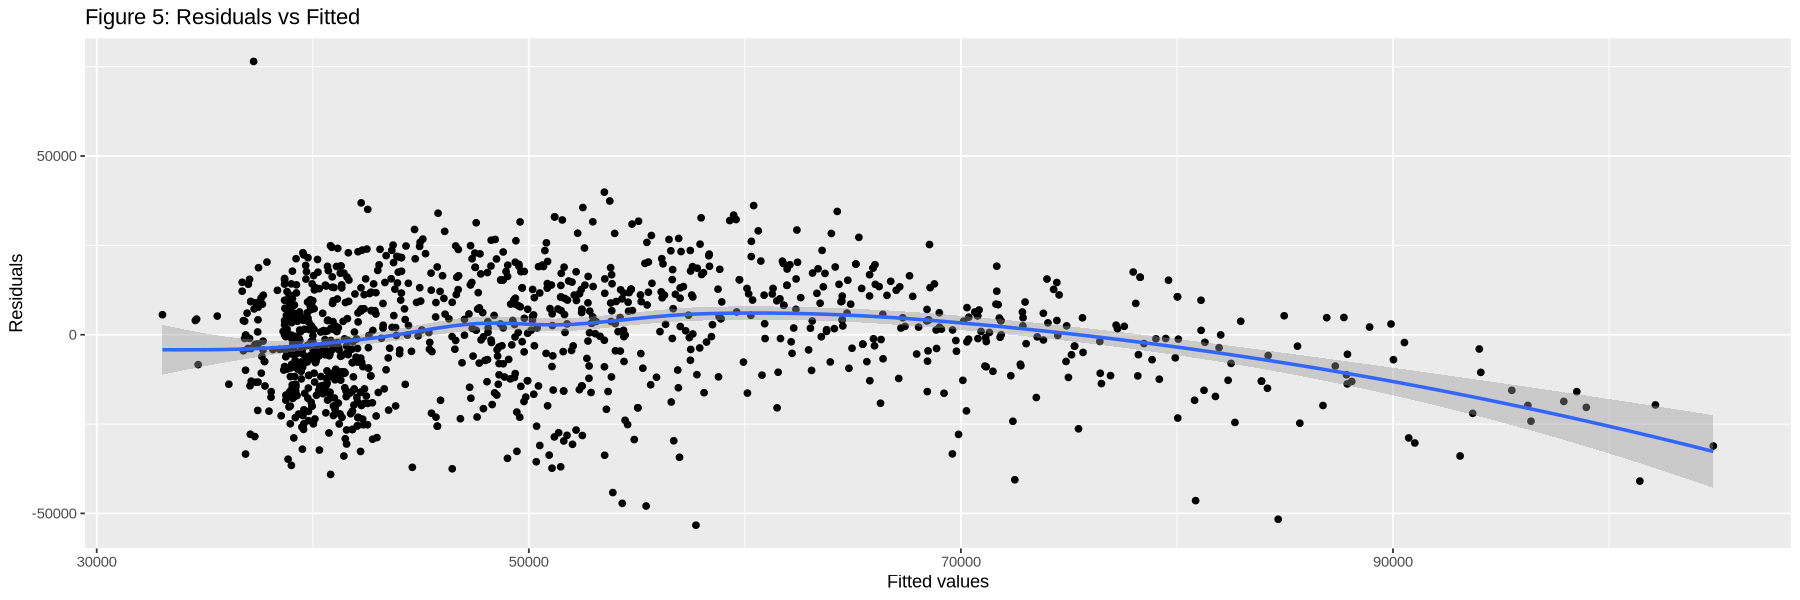

In [29]:
# Main developer: Jessie 
# Contributor: Anthony
# Plot the Residuals vs Fitted to check their linearity and heteroschedaticity
ggplot(customer_generative, aes(.fitted, .resid)) +
  geom_point() +
  geom_smooth(method = "loess") +
  labs(title = "Figure 5: Residuals vs Fitted", x = "Fitted values", y = "Residuals")


[1] 925 974

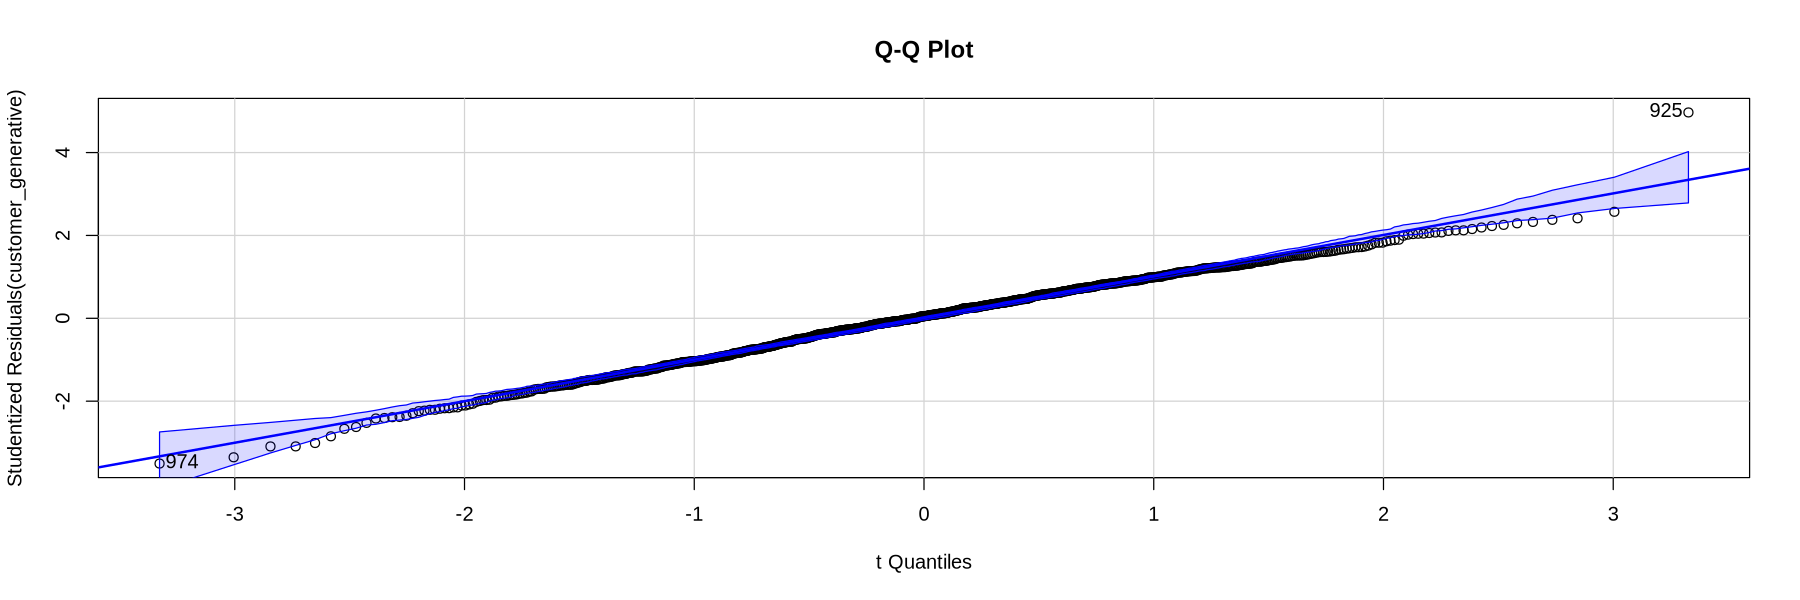

In [31]:
# Main developer: Jessie 
# Contributor: Annmarie (debugging)
qqPlot(customer_generative, main = "Q-Q Plot")

In the Normal Q-Q plot , most of the points lie on the diagonal reference line. A few deviations at both of the tails, this suggests some light-tailed behaviour. However, these deviations are reasonable and unlikely to have a huge impact on the validity of the model. Therefore, we consider the residuals are approximately normally distributed, the assumption ofnormality of residuals satisfied.

#### For the four assumptions we had earlier:
1. **Linearity:** Linearity assumption is likely violated.
2. **Independence:** The observations are independent.
3. **Homoscedasticity:** Homoscedasticity assumption is likely violated, the residuals don't have constant variance.
4. **Normality of residuals:** Residuals should be approximately normally distributed.

## 3. Discussion

### Reasons of Assumptions Violations

#### For the four assumptions we examined earlier, our model violates the linearity and homoscedasticity assumptions. Some possible reasons are listed below:
- **Linearity assumptions:**
    1.  Omitted Non-linear Terms: The true relationship between the predictors and the response may not be purely linear. Missing polynomial or interaction terms in the model could be the cause.
    2.  Missing Interaction Terms: Some omitted predictors may interact with predictors in the model, meaning the effect of one variable might depend on another.
    3.  Outliers: A few extreme points can make the regression line appears non-linear.
- **Homoscedasticity assumptioms:**
    1. Scale Effects in the Response Variable: If the response variable (income) naturally has greater variability at higher levels, the residual variance is less likely to remain constant.
    2. Data from Different Subgroups: When different subgroups have inherently different variances, the overall residual variance may be inconsistent.
    3. Non-linear Relationships: If the true relationship between predictors and the response is non-linear, the residuals from a fitted linear model are likely to be inconsistent.

### Furture Improvements

#### Possible improvements to the fitted model, based on the two assumption violations, are provided below:
- **Linearity assumptions:**
    1. Add polynomial terms as predictors like $x^2$ or $x^3$ to fit a non-linear model.
    2. Include interaction terms where the effect of one predictor may depend on another.
    3. Remove influential outliers that may distort linearity.
    4. Transform predictors and response variable like log or square root.
- **Homoscedasticity assumptioms:**
    1. Add missing predictor to better explain the variation in different ranges of fitted value.
    2. Remove extreme outliers that inflate variance at certain fitted values.
    3. Add interaction terms to better explain the variation in different ranges of fitted value.
    4. Limiting our data to a certain range. For example, we might only take the first 90% of the data points if we believe that very wealthy individuals have different spending habits from the general public.

### Results and Interpretation

We aim to investigate how customers’ income levels are associated with their demographics and product spending habits in the dataset. The multiple linear regression model suggests that the amount spent on fruit, the amount spent on fish, whether the customer complained, whether the customer accepted the first campaign offer, the amount spent on gold, and the customer’s marital status are associated with income level. Based on the model, only customer complaints show a negative association with income level; all other predictors have positive associations. The model demonstrates explanatory power with an adjusted R-squared of 0.426, indicating that about 42.6% of the variability in income is explained by the model.

In this study, many of the predictors align with our expectations, for example, spending more on fish, fruit, and gold is associated with higher income levels. However, some findings are more surprising. Prior complaints show a negative association with income level, while accepting a previous campaign offer shows a positive association. This might be because wealthier individuals tend to complain less and are more willing to accept campaign offers. Furthermore, having a marital status of “together” or “separated” is also positively associated with income level, which may be related to other sociological factors.

### Potential Future Research

Our research question was inspired by Engel’s Law, which describes how the proportion of spending on necessities declines as income rises. Future research could explore this relationship more directly by categorizing products into “necessities” and “luxuries” and examining how aggregated spending in each category relates to income. For example, items such as wine and sweets could be grouped together as discretionary luxury spending, allowing for clearer comparisons with staple goods.

While our analysis focused on inference, future work could shift toward prediction, evaluating how accurately product spending habits and demographics can predict an individual’s income.

Additionally, future research could examine how these income–spending patterns vary across other demographic subgroups, such as age, education, or household composition, to better understand how social and cultural factors shape consumption beyond what income alone predicts. 

## 4. References

- Chakrabarty, M., & Hildenbrand, W. (2011). Engel’s law reconsidered. _Journal of Mathematical Economics, 47_(3), 289–299. https://doi.org/10.1016/j.jmateco.2011.01.006
- Perthel, D. (1975). Engel’s law revisited. _International Statistical Review, 43_(2), 211. https://doi.org/10.2307/1402900
